# **Trabalhando com planilhas usando a biblioteca Pandas**

In [76]:
# importando a biblioteca Pandas
import pandas as pd

In [77]:
# leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [78]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [40]:
# juntando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [41]:
# média quantidade de todos juntos
df["Qtde"].mean()

3.2693602693602695

In [15]:
# mostra 5 primeiras linhas do arquivo
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [17]:
# mostra 5 últimas linhas do arquivo
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [19]:
# pegar 5 amostras
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
55,Recife,2019-01-01,20.03,983,4
157,Salvador,2019-01-02,150.17,1036,2
107,Aracaju,2018-01-01,142.57,1523,3
72,Salvador,2019-01-01,149.47,1036,3
11,Aracaju,2019-01-01,161.53,1520,4


In [22]:
# verificando os tipos das colunas
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [30]:
# alterando o tipo de dados de LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [26]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

# Valores faltantes


In [42]:
# somando os valores que possuem lacunas no meu dataframe
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      3
dtype: int64

In [43]:
# substituindo os valores nulos pela média
df["Qtde"].fillna(df["Qtde"].mean(), inplace=True)

In [44]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [51]:
# substituindo por zero
df["Qtde"].fillna(0, inplace=True)

In [54]:
# apagando linhas com valores nulos
df.dropna(inplace=True)

In [57]:
# apagando linhas nulas com base em uma determinada coluna
df.dropna(subset=["Vendas"], inplace=True)

In [58]:
# removendo linhas que estejam com valores nulos em todas as colunas
df.dropna(how="all", inplace=True)

# Criando novas colunas

In [91]:
# criando nova coluna Receitas
df["Receitas"] = df["Vendas"].mul(df["Qtde"])

In [61]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520.0,1.0,142.00
1,Aracaju,2018-01-01,14.21,1522.0,6.0,85.26
2,Aracaju,2018-01-01,71.55,1520.0,1.0,71.55
3,Aracaju,2018-01-01,3.01,1521.0,7.0,21.07
4,Aracaju,2018-01-01,24.51,1522.0,8.0,196.08


In [62]:
# criando coluna Receitas/Vendas
df["Receitas/Vendas"] = df["Receitas"] / df["Vendas"]

In [64]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520.0,1.0,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522.0,6.0,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520.0,1.0,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521.0,7.0,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522.0,8.0,196.08,8.0


In [65]:
# retornando a maior receita
df["Receitas"].max()

3544.0

In [67]:
# retornando a menor receita
df["Receitas"].min()

3.34

In [68]:
# nlargest retorna as linhas dos maiores valores baseados em determinada coluna
df.nlargest(3,"Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
7,Natal,2019-03-18,886.0,853.0,4.0,3544.0,4.0
51,Natal,2018-01-21,859.0,852.0,4.0,3436.0,4.0
55,Natal,2019-01-08,859.0,854.0,4.0,3436.0,4.0


In [69]:
# nsmallest retorna as linhas dos piores valores baseados em determinada coluna
df.nsmallest(3,"Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522.0,1.0,3.34,1.0
65,Recife,2019-01-01,4.01,981.0,1.0,4.01,1.0
92,Natal,2019-01-02,4.57,1035.0,1.0,4.57,1.0


In [71]:
# agrupa por cidades e soma as receitas de cada uma dessas
df.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25000
Fortaleza     38678.67633
Natal        167227.52000
Recife        51936.51000
Salvador      40596.73000
Name: Receitas, dtype: float64

In [74]:
# ordena pela coluna Receitas de forma descrescente e trás as primeiras 10
df.sort_values("Receitas", ascending= False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
7,Natal,2019-03-18,886.0,853.0,4.0,3544.0,4.0
55,Natal,2019-01-08,859.0,854.0,4.0,3436.0,4.0
51,Natal,2018-01-21,859.0,852.0,4.0,3436.0,4.0
30,Natal,2018-10-02,856.0,853.0,4.0,3424.0,4.0
41,Natal,2018-05-20,835.0,852.0,4.0,3340.0,4.0
38,Natal,2018-02-25,828.0,852.0,4.0,3312.0,4.0
10,Natal,2018-10-27,828.0,852.0,4.0,3312.0,4.0
69,Natal,2019-03-24,817.0,852.0,4.0,3268.0,4.0
62,Natal,2018-02-10,793.0,854.0,4.0,3172.0,4.0
52,Natal,2018-04-27,778.0,854.0,4.0,3112.0,4.0


# Trabalhando com datas

In [81]:
# transformando a coluna data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [84]:
# verificando o tipo de dados de cada coluna
df.dtypes

Cidade              object
Data                 int64
Vendas             float64
LojaID             float64
Qtde               float64
Receitas           float64
Receitas/Vendas    float64
dtype: object

In [86]:
# transformando a coluna de data em dada
df["Data"] = pd.to_datetime(df["Data"])

In [89]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                    float64
Qtde                      float64
Receitas                  float64
Receitas/Vendas           float64
dtype: object

In [93]:
# agrupamento por ano
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53000
2019    229011.15633
Name: Receitas, dtype: float64

In [95]:
df["Ano_Venda"] = df["Data"].dt.year

In [96]:
df.sample(5
          )

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda
39,Aracaju,2018-01-01,11.11,1522.0,8.0,88.88,8.0,2018
199,Salvador,2019-01-02,153.87,1036.0,3.0,461.61,3.0,2019
148,Salvador,2019-01-02,40.59,1037.0,3.0,121.77,3.0,2019
140,Recife,2019-03-02,166.89,983.0,5.0,834.45,5.0,2019
107,Aracaju,2018-01-01,142.57,1523.0,3.0,427.71,3.0,2018


In [99]:
# criando coluna de mês da venda e dia da venda
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [100]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda
41,Recife,2019-02-13,157.78,981.0,4.0,631.12,4.0,2019,2,13
139,Recife,2019-03-02,141.16,980.0,7.0,988.12,7.0,2019,3,2
177,Salvador,2019-01-02,41.19,1037.0,2.0,82.38,2.0,2019,1,2
14,Aracaju,2018-01-01,148.21,1521.0,3.0,444.63,3.0,2018,1,1
64,Natal,2019-02-22,704.00,853.0,4.0,2816.00,4.0,2019,2,22
74,Fortaleza,2019-01-01,163.09,1005.0,5.0,815.45,5.0,2019,1,1
26,Fortaleza,2019-01-01,18.93,1005.0,2.0,37.86,2.0,2019,1,1
85,Recife,2019-01-01,182.52,983.0,1.0,182.52,1.0,2019,1,1
10,Natal,2018-10-27,828.00,852.0,4.0,3312.00,4.0,2018,10,27
111,Aracaju,2018-01-01,24.25,1523.0,1.0,24.25,1.0,2018,1,1


In [101]:
# retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [103]:
# retornando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [104]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
118,Salvador,2019-03-02,92.21,1035.0,2.0,184.42,2.0,2019,3,2,425 days
165,Salvador,2019-01-02,11.54,1037.0,1.0,11.54,1.0,2019,1,2,366 days
70,Fortaleza,2019-01-01,79.57,1002.0,5.0,397.85,5.0,2019,1,1,365 days
115,Aracaju,2018-01-01,50.99,1522.0,10.0,509.90,10.0,2018,1,1,0 days
217,Salvador,2019-01-02,37.65,1036.0,2.0,75.30,2.0,2019,1,2,366 days


In [110]:
# criando coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [111]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trivemstre_venda,trimestre_venda
220,Salvador,2019-01-02,42.71,1035.0,1.0,42.71,1.0,2019,1,2,366 days,1,1
5,Fortaleza,2019-01-01,37.30,1002.0,5.0,186.50,5.0,2019,1,1,365 days,1,1
65,Natal,2019-04-05,292.00,852.0,2.0,584.00,2.0,2019,4,5,459 days,2,2
6,Recife,2019-01-01,16.27,981.0,6.0,97.62,6.0,2019,1,1,365 days,1,1
159,Natal,2019-01-02,172.52,1035.0,1.0,172.52,1.0,2019,1,2,366 days,1,1
61,Aracaju,2018-01-01,39.80,1520.0,6.0,238.80,6.0,2018,1,1,0 days,1,1
56,Aracaju,2018-01-01,41.90,1523.0,6.0,251.40,6.0,2018,1,1,0 days,1,1
65,Salvador,2019-01-01,3.39,1034.0,2.0,6.78,2.0,2019,1,1,365 days,1,1
163,Natal,2019-01-02,17.66,1036.0,3.0,52.98,3.0,2019,1,2,366 days,1,1
97,Recife,2019-01-01,153.04,983.0,4.0,612.16,4.0,2019,1,1,365 days,1,1


In [124]:
# filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month== 3)]

In [126]:
vendas_marco_19.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trivemstre_venda,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981.0,4.0,611.56,4.0,2019,3,2,425 days,1,1
109,Fortaleza,2019-03-02,18.90,982.0,6.0,113.40,6.0,2019,3,2,425 days,1,1
110,Fortaleza,2019-03-02,51.98,983.0,6.0,311.88,6.0,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981.0,3.0,24.00,3.0,2019,3,2,425 days,1,1
112,Fortaleza,2019-03-02,133.59,982.0,1.0,133.59,1.0,2019,3,2,425 days,1,1


# Visualização de dados 
# Biblioteca matplotlib

In [131]:
df["LojaID"] = df["LojaID"].astype("int64")
df["LojaID"].value_counts( ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

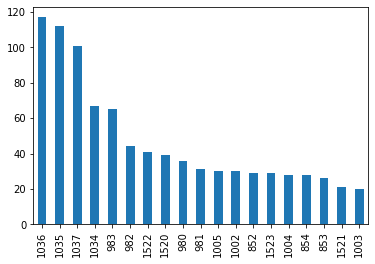

In [132]:
# gráfico de barras
df["LojaID"].value_counts( ascending=False).plot.bar()

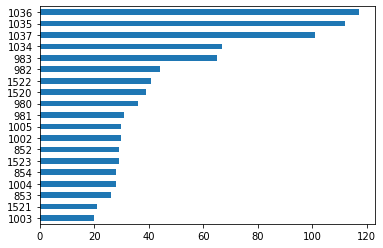

In [134]:
# gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

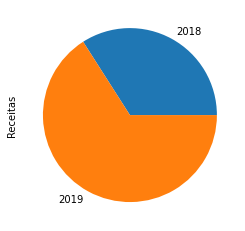

In [137]:
# gráfico de setores
df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie()

In [139]:
# total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

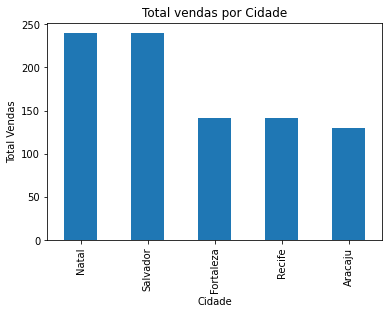

In [141]:
# adicionando um título e nomes aos dois eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

Text(0, 0.5, 'Total Vendas')

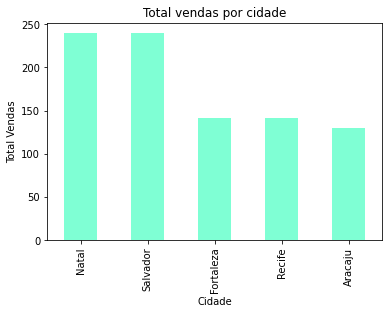

In [146]:
# alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="aquamarine")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [147]:
# alterando o estilo
plt.style.use("ggplot")

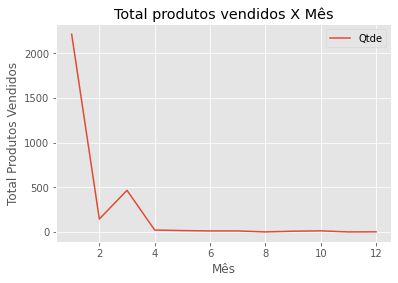

In [151]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos vendidos X Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

In [152]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2212.538721
2      146.269360
3      467.000000
4       23.000000
5       17.000000
6       13.000000
7       13.000000
8        2.000000
9       10.000000
10      14.000000
11       2.000000
12       3.000000
Name: Qtde, dtype: float64

In [156]:
# selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]


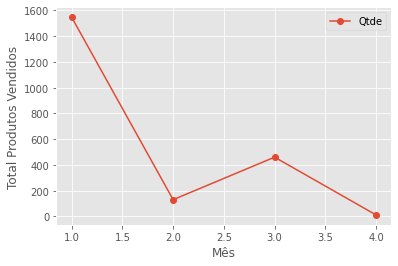

In [161]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o" )
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [160]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()


mes_venda
1    1545.538721
2     130.269360
3     460.000000
4      12.000000
Name: Qtde, dtype: float64

(array([188., 193., 224.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

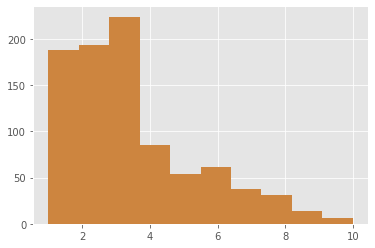

In [164]:
# histograma
plt.hist(df["Qtde"], color="peru")

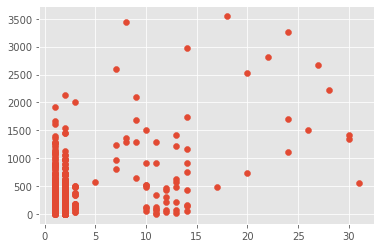

In [167]:
# gráfico de dispersão
plt.scatter(x = df_2019["dia_venda"], y = df_2019["Receitas"] );

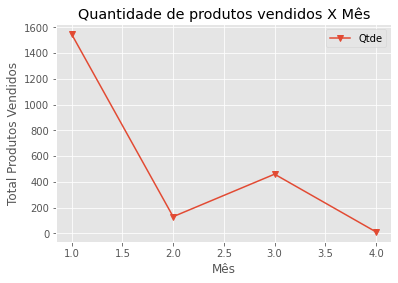

In [168]:
# salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos X Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico Qtde x Mes.png")